## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_dir = '/Users/ur001/Documents/Netology/a4tunado_lectures/lectures/cv/002/data/digit'
random_state = 777

%pylab inline
%config InlineBackend.figure_format = 'retina'

# отключаем ворнинги
import warnings
warnings.simplefilter('ignore')

Populating the interactive namespace from numpy and matplotlib


## Загружаем исходные данные

In [3]:
def load_data():
    train = np.loadtxt(os.path.join(data_dir, 'train.csv'), delimiter=',', skiprows=1)
    test = np.loadtxt(os.path.join(data_dir, 'test.csv'), delimiter=',', skiprows=1)
    # сохраняем разметку в отдельную переменную
    y_train = train[:, 0]
    # приводим размерность к удобному для обаботки виду
    X_train = train[:, 1:].astype(np.float32)
    X_test = test.astype(np.float32)
    return X_train, X_test, y_train

In [4]:
X_train, X_test, y_train = load_data()
X_train.shape

(42000, 784)

## Визуализируем исходные данные

In [5]:
def plot_digits(digits, labels, count=35):
    fig = plt.figure(figsize=(20, 10))
    cols = min(10, int(np.sqrt(count)))
    rows = np.ceil(count / cols)
    for i, digit in enumerate(digits[0:count], 1):
        subplot = fig.add_subplot(cols, rows, i)
        plt.imshow(digit.reshape((28, 28)), cmap='gray');
        subplot.set_title('{:.0f}'.format(labels[i - 1]))

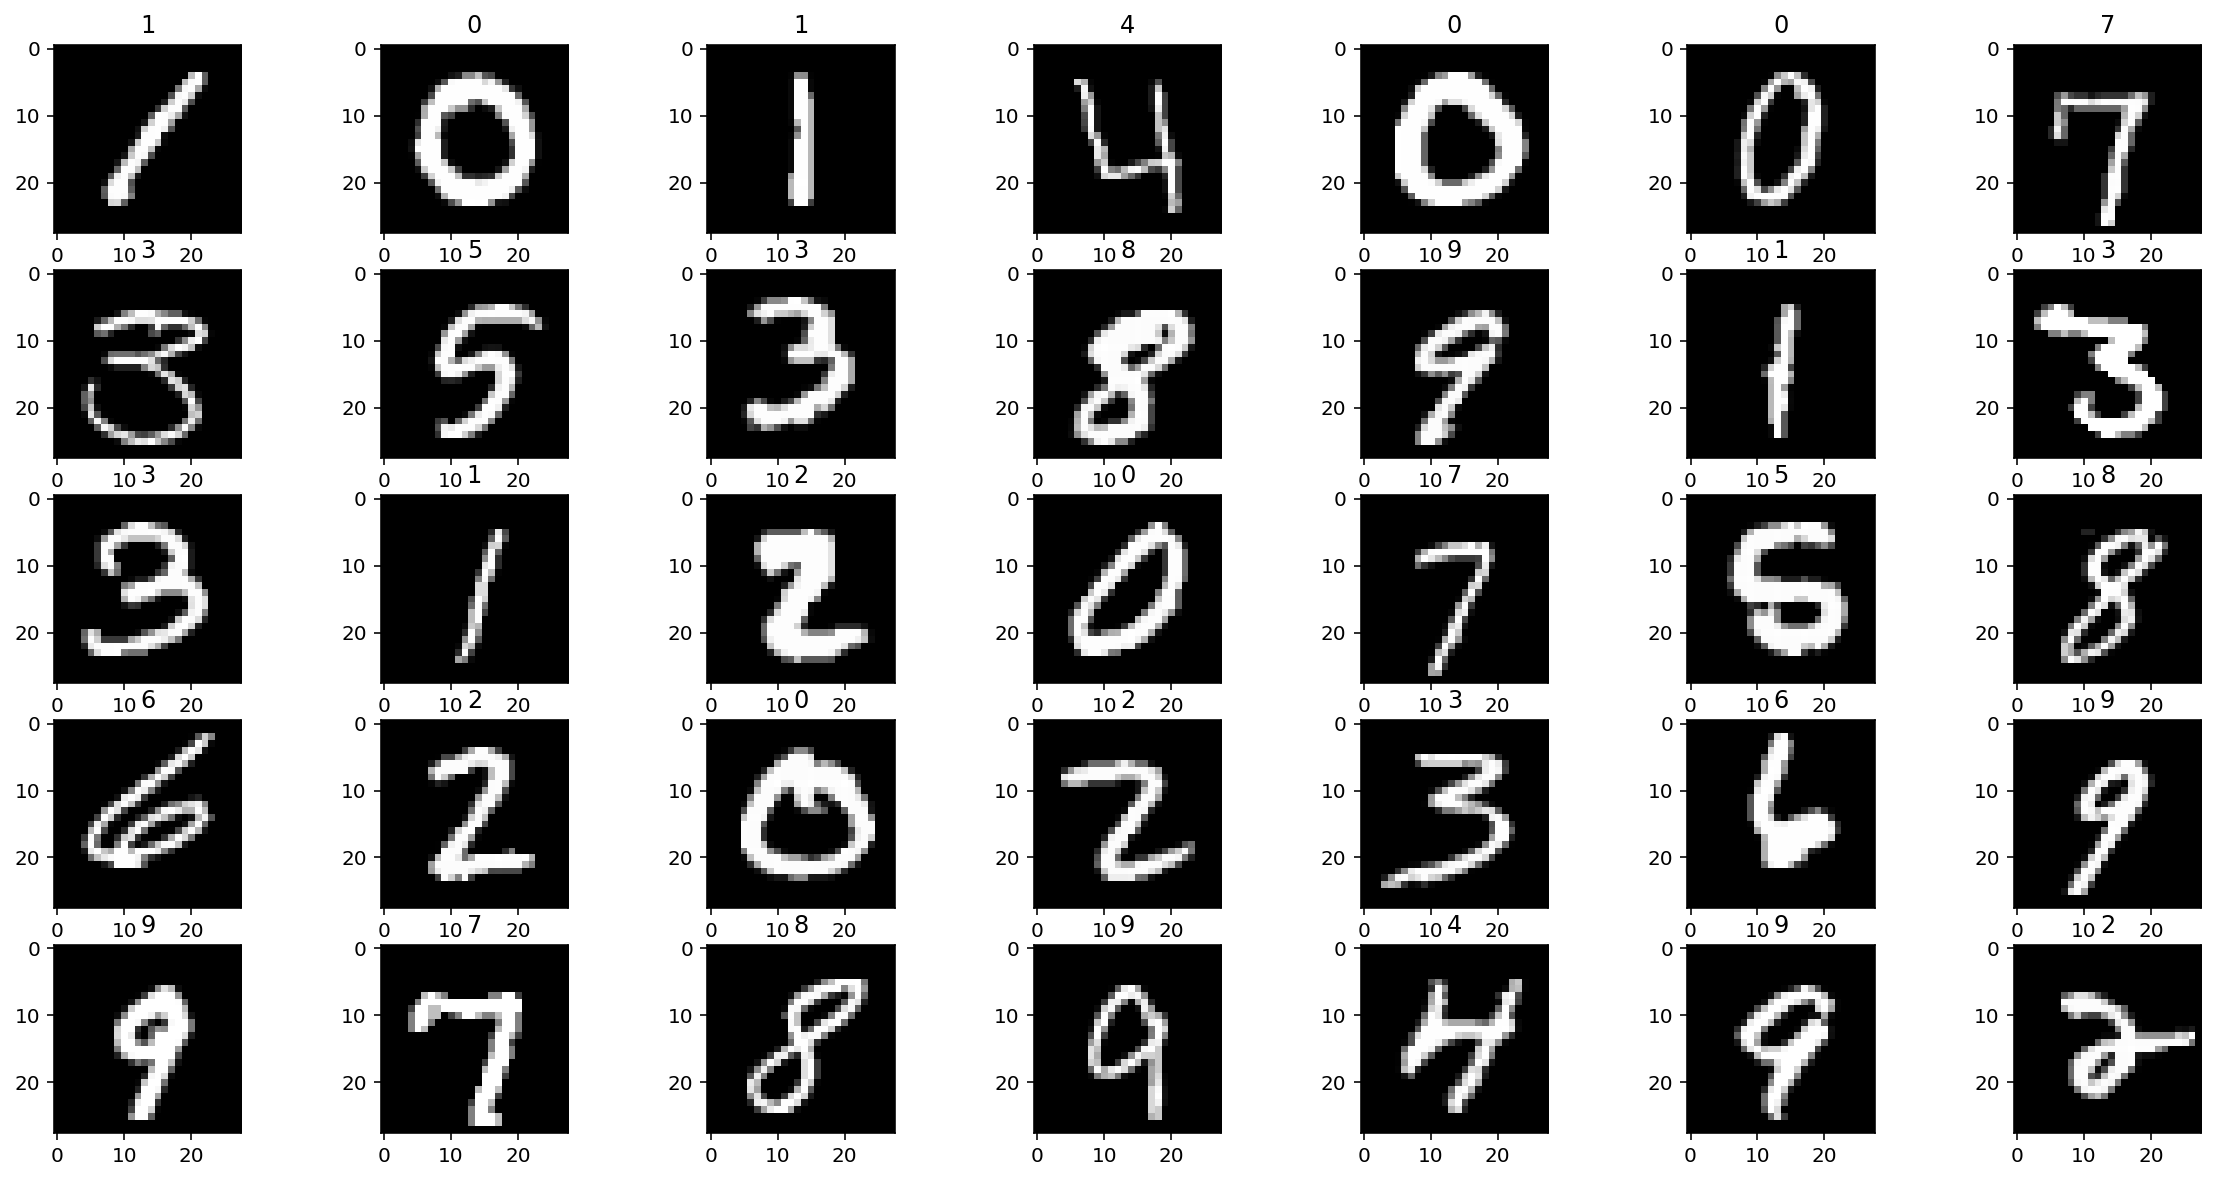

In [6]:
plot_digits(X_train, y_train, 35)

## Снижаем размерность с помощью метода главных компонент  PCA

In [24]:
from sklearn.decomposition import PCA

def reduce_dimension(data, n_components=32):
    reducer = PCA(n_components).fit(data[0])
    return list(map(reducer.transform, data))

In [31]:
X_train_pca, X_test_pca = reduce_dimension([X_train, X_test], n_components=50)

## Оцениваем качество решение на валидационной выборке

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def cross_validate(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=0.5)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_predict)))
    print('\nClassification report\n-------------------------\n')
    print(classification_report(y_test, y_predict))
    print('\nConfusion matrix\n-------------------------\n')
    print(confusion_matrix(y_test, y_predict))

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

cross_validate(model,X_train_pca, y_train)

Accuracy: 0.96800

Classification report
-------------------------

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98      2029
        1.0       0.96      0.99      0.98      2349
        2.0       0.98      0.96      0.97      2084
        3.0       0.97      0.96      0.96      2159
        4.0       0.97      0.97      0.97      2014
        5.0       0.96      0.96      0.96      1905
        6.0       0.98      0.99      0.98      2092
        7.0       0.96      0.97      0.96      2198
        8.0       0.98      0.94      0.96      2056
        9.0       0.94      0.95      0.95      2114

avg / total       0.97      0.97      0.97     21000


Confusion matrix
-------------------------

[[2008    1    1    0    1    2   12    2    1    1]
 [   0 2336    3    0    0    0    1    5    1    3]
 [  12   19 2011    1    0    0    1   31    7    2]
 [   0    8   21 2068    0   24    1   11   15   11]
 [   0   15    0    0 1949    0    6

## Предсказания на тестовыйх данных

In [34]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_pca, y_train)
y_predict = model.predict(X_test_pca)

## Визуализируем предсказания

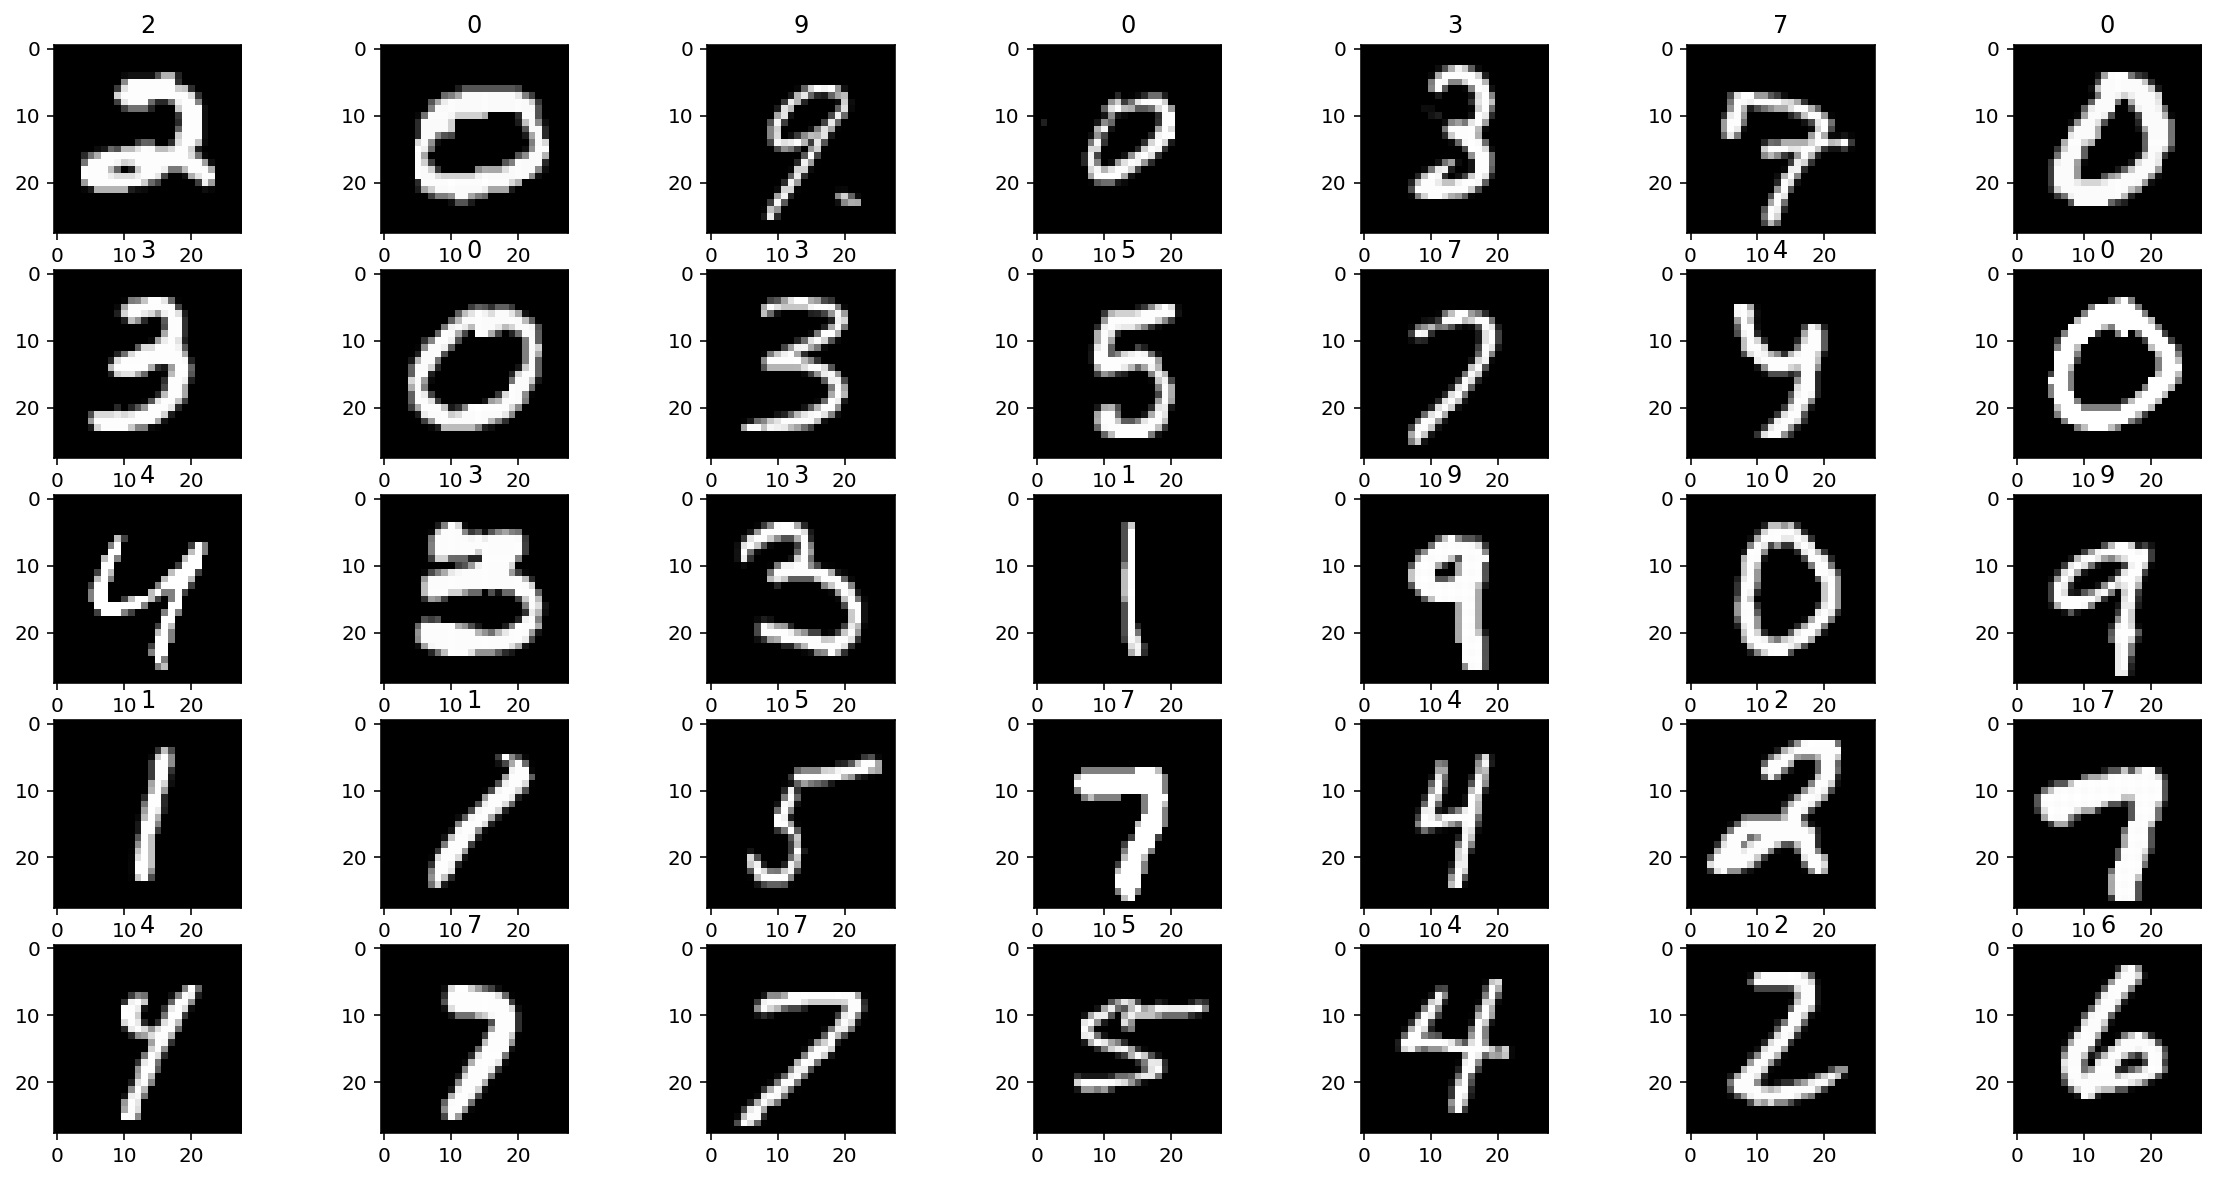

In [35]:
plot_digits(X_test, y_predict)

## Готовим файл для отправки

In [36]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_predict, 1):
        dst.write('{},{:.0f}\n'.format(i, p))

In [37]:
!head submit.txt

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0


In [270]:
# Your submission scored 0.97185 (PCA 32)